# Sensor Positioning Submission

Add your solution below!

To run the notebook in VS Code, you can click on the `Run All` button in the toolbar. You may need to select the kernel to run. When prompted select `Python Environments` and then `.venv` (Should be starred).

> Note: You can add dependencies to your virtual environment by running `aqora add <dependency name>` or editing the `pyproject.toml` at the root of the project and running `aqora install`

Once you're ready, you can open a terminal by clicking `Terminal` and then `New Terminal` in the context bar at the very top. To test your solution, run

```bash
aqora test
```

Finally, once all the tests are passing, to submit to **Aqora** run

```bash
aqora upload
```


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

import luna_sdk
from use_case import get_active_edges

In [2]:
# Add your LUNA_ENCRYPTION_KEY to the .env file
load_dotenv()
# Uncomment the following line to check to see if the LUNA_ENCRYPTION_KEY is set
# os.getenv("LUNA_ENCRYPTION_KEY")

True

In [3]:
# Example input. Parameters will be injected here by aqora
input = (
    # V_L
    np.array([1, 1, 1, 1, 1, 1], dtype=np.int8),
    # V_S
    np.array([1, 1, 1, 1, 1], dtype=np.int8),
    # Edges (L x S)
    np.array([
       [0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]],
    dtype=np.int8)
)

In [4]:
V_L, V_S, edges = input

In [5]:
# Set blocking to True to pause `aqora test` execution until the plot is closed
def plt_bipartite_graph(V_L, V_S, edges, block=False):
    # Set up positions for nodes in the two sets
    x_l = np.zeros(len(V_L))  # x-coordinates of the first set
    y_l = np.linspace(0, 1, len(V_L))  # y-coordinates of the first set
    x_s = np.ones(len(V_S))  # x-coordinates of the second set
    y_s = np.linspace(0, 1, len(V_S))  # y-coordinates of the second set

    # Plot the nodes
    plt.scatter(x_l[V_L.nonzero()], y_l[V_L.nonzero()], color='green', label='V_L active')
    plt.scatter(x_l[np.nonzero(V_L == 0)], y_l[np.nonzero(V_L == 0)], color='red', label='V_L inactive')
    plt.scatter(x_s, y_s, color='blue', label='V_S')

    # Plot the edges
    for i in range(len(V_L)):
        for j in range(len(V_S)):
            if edges[i, j] == 1:  # There's an edge between node i in Set 1 and node j in Set 2
                plt.plot([x_l[i], x_s[j]], [y_l[i], y_s[j]], color='gray', linestyle='-', linewidth=1)

    # Add labels and legend
    plt.title("Bipartite Graph")
    plt.legend()
    plt.axis('off')
    plt.show(block=block)

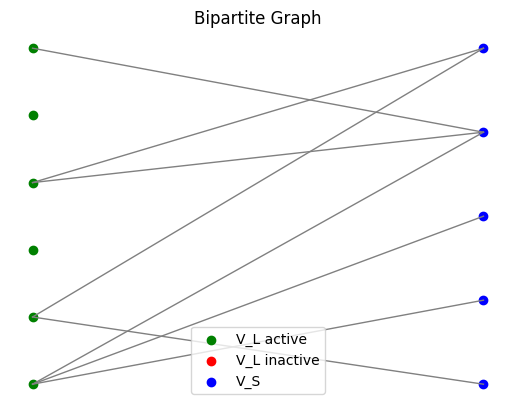

In [6]:
plt_bipartite_graph(V_L, V_S, edges)

In [7]:
# Insert your code here

# We do a trivial solution for the example input
V_L[2:] = 0

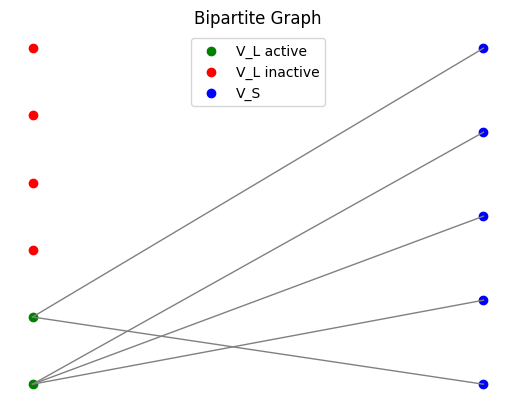

In [8]:
plt_bipartite_graph(V_L, V_S, get_active_edges(V_L, V_S, edges))

In [9]:
# Set the output variable to submit the result of your algorithm
output = V_L